In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib
import sys
sys.path.append(r"C:\Users\prash\OneDrive\Desktop\seventh semester\Project\Sentimental_Analysis\Website\backend")


In [2]:

# import sys
# import os

# # Add the full path to sentiment folder
# sentiment_path = os.path.abspath("Website/backend/sentiment")
# if sentiment_path not in sys.path:
#     sys.path.append(sentiment_path)
from sentiment.tokenizer import nepali_tokenizer #nepali_tokenizer is the function defined in tokinizer.py in sentiment

In [3]:

nepali_stopwords = set([
    'अनि', 'अहिले', 'अरू', 'अर्को', 'अब', 'आफ्नो', 'इत्यादि', 'उनि', 'उसले', 'एक', 'एउटा',
    'एउटै', 'ओ', 'कति', 'कसैले', 'कसैलाई', 'कसैसँग', 'कसै', 'कसैको', 'कसको', 'कहिले',
    'कि', 'के', 'को', 'कोही', 'कोहीलाई', 'कोहीसँग', 'कुन', 'कुनै', 'कृपया', 'गरेको',
    'गर्छ', 'गर्नु', 'गरे', 'गर्छु', 'गरेछ', 'गरेका', 'गए', 'गएका', 'गएर', 'चाहिन्छ',
    'चाहे', 'जब', 'जहाँ', 'जे', 'त', 'तपाईं', 'तपाइँ', 'तपाइँले', 'तर', 'तिनी', 'तिनीहरू',
    'तिनीहरूलाई', 'तिनीहरूका', 'तिनीहरूको', 'ती', 'तीन', 'त्यो', 'त्स्याइ', 'दिएको', 'दिएर',
    'दुई', 'देखि', 'न', 'नभएको', 'नभए', 'नत्र', 'नजिकै', 'नाम', 'निकै', 'पनि', 'पर्छ',
    'पढ्ने', 'पारेर', 'पहिले', 'पनि', 'परेको', 'प्रति', 'फेरि', 'बनेको', 'बन्छ', 'बरु',
    'बाहेक', 'भएको', 'भएकाले', 'भएर', 'भने', 'भन्ने', 'भन्नु', 'भयो', 'भइ', 'भइरहेको',
    'म', 'मलाई', 'मेरो', 'हामी', 'हामीले', 'हाम्रो', 'हुन्छ', 'हुन्', 'हो', 'होइन', 'हरु',
    'संग', 'सक्ने', 'सबै', 'साथै', 'सधैं', 'समेत', 'सो', 'सोही', 'साथ', 'सिर्फ', 'सोधेको',
    'हुनु', 'हुन', 'थियो', 'थिए', 'थिइन्', 'थिएन', 'थाल्यो', 'तथा'
])


In [4]:
# reading data from given path
df=pd.read_csv(r"archive (2).zip")
# Removing nto available data
df.dropna(subset=['Sentences'], inplace=True)
# Removing duplicated data
df.drop_duplicates(subset=['Sentences'], inplace=True)
print(df.columns)
# Clean Data
df.head()





Index(['Unnamed: 0', 'Sentences', 'Sentiment'], dtype='object')


,Unnamed: 0,Sentences,Sentiment
0,0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1
1,1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
2,2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1
3,3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1
4,4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1


In [ ]:
# Clean Data

def clean_text(text):
    text = str(text)
   
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove links
    text = re.sub(r"[a-zA-Z]", "", text)                 # Remove English letters
    text = re.sub(r"[^\u0900-\u097F\s]", "", text)       # Remove everything except Nepali and spaces
    # text = re.sub(r"\d+", "", text) # Remove digits
    text = re.sub(r"[^\u0900-\u097F\s]", "", text)  # Remove punctuation & emojis
    text = re.sub(r"[0-9\u0966-\u096F]+", "", text)  # Remove Nepali and English digits 
    text=re.sub(r"।","",text) # remove |
    text = re.sub(r'\s+', ' ', text).strip()             # Normalize spaces
    
    return text
# Cleaning
df['clean_text'] = df['Sentences'].apply(clean_text)
# df['clean_text'] = df['Sentences'].apply(clean_text)
# clean_text stores the Sentences cleaned using clean_text

# Show cleaned data
print(df[['Sentences', 'clean_text', 'Sentiment']].head())

                                           Sentences  \
0  म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...   
1  म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...   
2  कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...   
3  मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...   
4  यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...   

                                          clean_text  Sentiment  
0  म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे साम...          1  
1  म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी ...          1  
2  कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...          1  
3  मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...          1  
4  यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...          1  


In [6]:
# # Tokenizing 
# def tokenization(sentence):
#     return sentence.split()
# # Applying the tokenization function
# df['token'] = df['clean_text'].apply(tokenization)
# print(df[["clean_text","token"]].head())

In [7]:
# # Tokenize each sentence using Indic NLP
from indicnlp.tokenize import indic_tokenize
# df['token'] = df['Sentences'].apply(lambda x: indic_tokenize.trivial_tokenize(x))

# print(df[['Sentences', 'token', 'Sentiment']])
def tokenization(sentence):
    return indic_tokenize.trivial_tokenize(sentence,lang="ne")
df["token"]=df["clean_text"].apply(tokenization)
print(df[["clean_text","token"]].head())

                                          clean_text  \
0  म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे साम...   
1  म सरकारी स्कूलकलेजमा पढेर करीब बर्ष भन्दा बढी ...   
2  कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...   
3  मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...   
4  यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...   

                                               token  
0  [म, एक, शिक्षक, शिक्षा, क्षेत्रमा, रमाएको, मान...  
1  [म, सरकारी, स्कूलकलेजमा, पढेर, करीब, बर्ष, भन्...  
2  [कति, राम्रो, शिव, मन्दिर, देख्न, पाइयो, कुन, ...  
3  [मारुनी, भन्ने, वितिकै, सामान्य, नाचनीमा, आधार...  
4  [यो, फ्लिम, हेरिसकेपछी, थाहा, भयो, कि, किन, दर...  


In [8]:
from collections import Counter
all_tokens = [token for tokens in df['token'] for token in tokens] #used for filter and normalize token
token_freq = Counter(all_tokens).most_common(100)  # Inspect top 100 tokens
# Manually review and add non-informative tokens to nepali_stopwords

In [9]:
# Stop word 
def remove_stopwords(tokens):
    return [word for word in tokens if word not in nepali_stopwords]

df['filtered_tokens'] = df['token'].apply(remove_stopwords)
print("Filtered token",df['filtered_tokens'])
print(df["filtered_tokens"].head())
# Show result
print(df[['Sentences', 'clean_text', 'token', 'filtered_tokens', 'Sentiment']].head())

Filtered token 0        [शिक्षक, शिक्षा, क्षेत्रमा, रमाएको, मान्छे, सा...
1        [सरकारी, स्कूलकलेजमा, पढेर, करीब, बर्ष, भन्दा,...
2        [राम्रो, शिव, मन्दिर, देख्न, पाइयो, ठाउको, होल...
3        [मारुनी, वितिकै, सामान्य, नाचनीमा, आधारित, कथा...
4        [यो, फ्लिम, हेरिसकेपछी, थाहा, किन, दर्सकहरुले,...
                               ...                        
35784    [कोरोना, भाइरसलाई, विश्व, स्वास्थ्य, संगठनले, ...
35785       [डब्ल्युएचओले, दियाेको, कोरोनाको, नयाँ, कोभिड]
35786           [कोरोना, भाइरस, संक्रमणको, औपचारिक, कोभिड]
35787    [विश्व, स्वास्थ्य, संगठन, डब्लुएचओ, ले, नोबल, ...
35788    [कोरोनाभाइरसका, सङ्क्रमणको, कोभिड, भनेर, विश्व...
Name: filtered_tokens, Length: 35732, dtype: object
0    [शिक्षक, शिक्षा, क्षेत्रमा, रमाएको, मान्छे, सा...
1    [सरकारी, स्कूलकलेजमा, पढेर, करीब, बर्ष, भन्दा,...
2    [राम्रो, शिव, मन्दिर, देख्न, पाइयो, ठाउको, होल...
3    [मारुनी, वितिकै, सामान्य, नाचनीमा, आधारित, कथा...
4    [यो, फ्लिम, हेरिसकेपछी, थाहा, किन, दर्सकहरुले,...
Name: fil

In [10]:
# from indicnlp.morph import unsupervised_morph
# morph_analyzer = unsupervised_morph.UnsupervisedMorphAnalyzer('ne')

# def stem_tokens(tokens):
#     return [morph_analyzer.morph_analyze(token, 'ne') for token in tokens]
# df['stemmed_tokens'] = df['filtered_tokens'].apply(stem_tokens)


In [11]:
print(df['Sentiment'].dtype)
# Since Sentiment is already is in numerical value so we will not Perform LabelEncoder


int64


In [12]:
df['Sentiment'].value_counts()

Sentiment
 1    15857
-1    14393
 0     5482
Name: count, dtype: int64

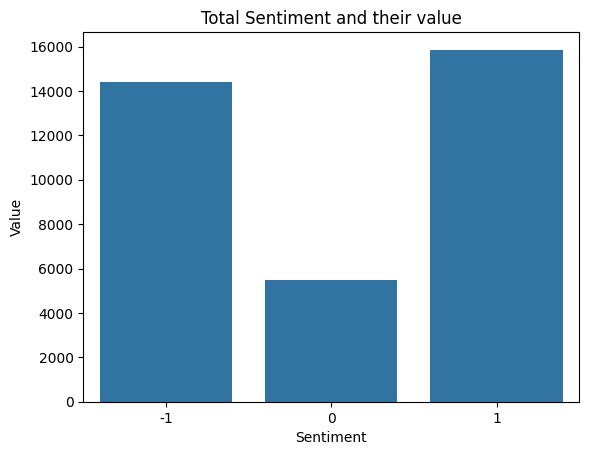

In [13]:
sns.countplot(x=df["Sentiment"])
plt.title("Total Sentiment and their value")
plt.xlabel("Sentiment")
plt.ylabel("Value")
plt.show()

In [15]:
# TF-IDF on cleaned text
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from indicnlp.tokenize import indic_tokenize

# Suppress the token_pattern warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.feature_extraction.text")
# def nepali_tokenizer(text):
#     return indic_tokenize.trivial_tokenize(text, lang='ne')
# TF-IDF on cleaned text
vectorizer = TfidfVectorizer(tokenizer=nepali_tokenizer,
                            token_pattern=None)
X = vectorizer.fit_transform(df['clean_text'])
y = df['Sentiment']

In [16]:
df['token'] = df['clean_text'].apply(tokenization)
df['filtered_tokens'] = df['token'].apply(remove_stopwords)
df['processed_text'] = df['filtered_tokens'].apply(lambda x: ' '.join(x))

In [17]:

from sklearn.utils import resample
# Manual oversampling of neutral class
df_positive = df[df['Sentiment'] == 1]
df_negative = df[df['Sentiment'] == -1]
df_neutral = df[df['Sentiment'] == 0]

# Oversample neutral class to match positive class
df_neutral_upsampled = resample(df_neutral, replace=True, n_samples=len(df_positive), random_state=42)

# Combine classes
df_balanced = pd.concat([df_positive, df_negative, df_neutral_upsampled])

# Verify class distribution before vectorization
print("Class distribution after oversampling:", df_balanced['Sentiment'].value_counts())

Class distribution after oversampling: Sentiment
 1    15857
 0    15857
-1    14393
Name: count, dtype: int64


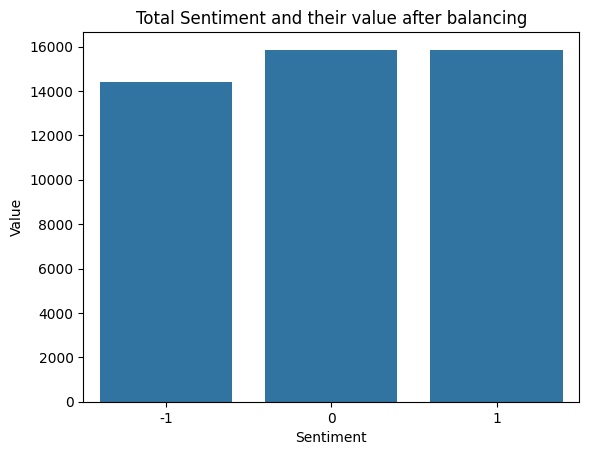

In [18]:
sns.countplot(x=df_balanced["Sentiment"])
plt.title("Total Sentiment and their value after balancing")
plt.xlabel("Sentiment")
plt.ylabel("Value")
plt.show()

In [19]:
# TF-IDF vectorization
from indicnlp.tokenize import indic_tokenize



vectorizer = TfidfVectorizer(
    tokenizer=nepali_tokenizer,
    token_pattern=None,
    max_df=0.95,
    min_df=5,
    ngram_range=(1, 2)
)

X = vectorizer.fit_transform(df_balanced['processed_text'])
y = df_balanced['Sentiment']

In [20]:
# X= vectorizer.fit_transform(df_balanced['processed_text'])
# y = df_balanced['Sentiment']

In [21]:
#Verify class distribution after vectorization
print("Class distribution of y:", pd.Series(y).value_counts())

Class distribution of y: Sentiment
 1    15857
 0    15857
-1    14393
Name: count, dtype: int64


In [22]:
X.shape # since no.of sample > no.of features of setting dual=False in linearSVM

(46107, 38752)

In [23]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [24]:
# # Train SVM with custom class weights
class_weights = {-1: 1.0, 0: 2.0, 1: 1.0}  # Emphasize neutral class
# model = SVC(kernel='linear', class_weight=class_weights, C=1.0)
# model.fit(X_train, y_train)
from sklearn.svm import LinearSVC
model = LinearSVC(class_weight=class_weights, C=1.0,dual=False, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,False
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{-1: 1.0, 0: 2.0, 1: 1.0}"
,verbose,0
,random_state,None


In [25]:
print(X_train.shape)
print(X_test.shape)

(36885, 38752)
(9222, 38752)


In [26]:
# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8056820646280634
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.73      0.76      2871
           0       0.81      0.93      0.87      3191
           1       0.81      0.75      0.78      3160

    accuracy                           0.81      9222
   macro avg       0.81      0.80      0.80      9222
weighted avg       0.81      0.81      0.80      9222



In [27]:
# Kfold Cross validation
from sklearn.model_selection import cross_val_score,StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Scores:", svm_scores)
print("Mean Accuracy:", np.mean(svm_scores))

Cross-Validation Scores: [0.81251355 0.80470614 0.80598634 0.81216788 0.80403427]
Mean Accuracy: 0.8078816349703495


In [28]:
# Testing the model
user_input = input("नेपाली वाक्य लेख्नुहोस्: (Enter a Nepali sentence) ")  # Enter a Nepali sentence
user_vector = vectorizer.transform([user_input])
prediction = model.predict(user_vector)[0]

sentiment_map = {-1: "Negative (नकारात्मक)", 0: "Neutral (तटस्थ)", 1: "Positive (सकारात्मक)"}
print("पूर्वानुमान गरिएको भावना:", sentiment_map.get(prediction, "Unknown"))



नेपाली वाक्य लेख्नुहोस्: (Enter a Nepali sentence)  a


पूर्वानुमान गरिएको भावना: Neutral (तटस्थ)


In [29]:
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [30]:
joblib.dump(model, 'sentiment_model.joblib')

['sentiment_model.joblib']

In [31]:
print(df['Sentiment'].value_counts())


Sentiment
 1    15857
-1    14393
 0     5482
Name: count, dtype: int64


In [40]:

joblib.dump(vectorizer, r"C:\Users\prash\OneDrive\Desktop\seventh semester\Project\Sentimental_Analysis\sentiment_model.joblib")



['C:\\Users\\prash\\OneDrive\\Desktop\\seventh semester\\Project\\Sentimental_Analysis\\sentiment_model.joblib']

In [52]:
joblib.dump(model, r"C:\Users\prash\OneDrive\Desktop\seventh semester\Project\Sentimental_Analysis\sentiment_model.joblib")

['C:\\Users\\prash\\OneDrive\\Desktop\\seventh semester\\Project\\Sentimental_Analysis\\sentiment_model.joblib']

In [42]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(max_iter=1000,class_weight=class_weights)
model_lg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{-1: 1.0, 0: 2.0, 1: 1.0}"
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [43]:

lg_pred=model_lg.predict(X_test)

In [44]:
print("Classification report : \n",classification_report(y_test,lg_pred))

Classification report : 
               precision    recall  f1-score   support

          -1       0.82      0.64      0.72      2871
           0       0.70      0.93      0.80      3191
           1       0.81      0.69      0.75      3160

    accuracy                           0.76      9222
   macro avg       0.78      0.76      0.75      9222
weighted avg       0.77      0.76      0.76      9222



In [45]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lg_scores = cross_val_score(model_lg, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Scores:", lg_scores)
print("Mean Accuracy:", np.mean(lg_scores))

Cross-Validation Scores: [0.77575363 0.76523531 0.7678126  0.76857174 0.76466761]
Mean Accuracy: 0.7684081772272098


In [46]:
# NavieBayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight={-1:1.0, 0:2.0, 1:1.0}, y=y_train)

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train, sample_weight=sample_weights)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [47]:
nb_ypred=model_nb.predict(X_test)
print(classification_report(y_test, nb_ypred))

              precision    recall  f1-score   support

          -1       0.78      0.59      0.67      2871
           0       0.69      0.87      0.77      3191
           1       0.75      0.71      0.73      3160

    accuracy                           0.73      9222
   macro avg       0.74      0.72      0.72      9222
weighted avg       0.74      0.73      0.73      9222



In [48]:

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nb_scores = cross_val_score(model_nb, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Scores:", nb_scores)
print("Mean Accuracy:", np.mean(nb_scores))

Cross-Validation Scores: [0.73357189 0.72457168 0.73701334 0.73235007 0.73408524]
Mean Accuracy: 0.7323184439091265


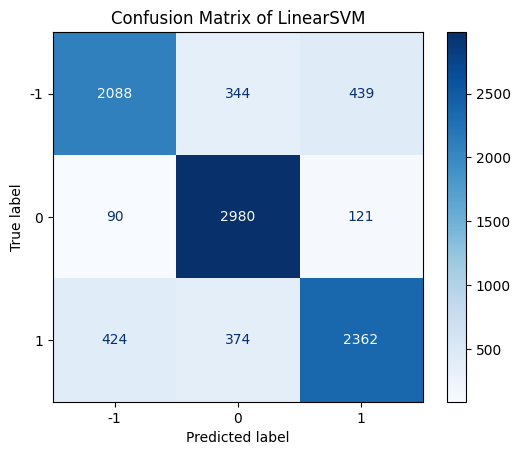

In [49]:
# Confusion matrix for true positive ,true negative,false positive ,false negative for LinearSVM
from sklearn.metrics import confusion_matrix ,classification_report,ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[-1, 0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of LinearSVM")
plt.show()

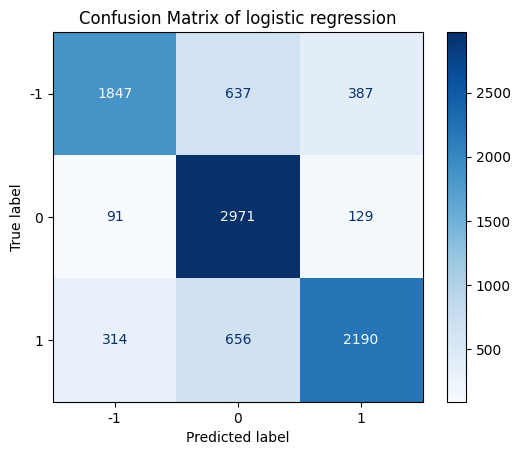

In [50]:
# Confusion matrix
cm = confusion_matrix(y_test,lg_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[-1, 0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of logistic regression")
plt.show()

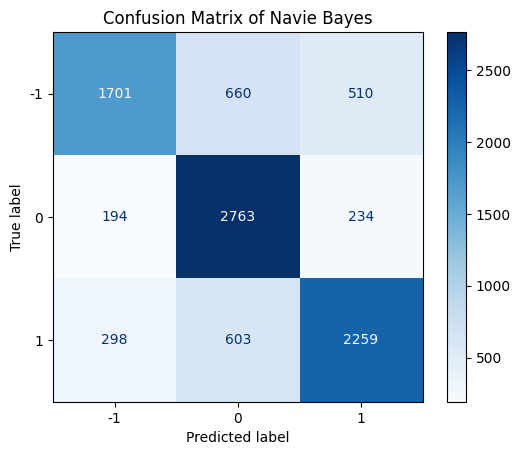

In [51]:
# Confusion matrix
cm = confusion_matrix(y_test,nb_ypred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[-1, 0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of Navie Bayes")
plt.show()